In [13]:
import numpy as np
data=np.load('/home/minkyukim/sam-tutorial/brats_feature/layer_1_output.npy')
print(data.shape)

#/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth, /mnt/sda/minkyukim/pth/sam-tutorial_brats/medsam_model_11_refined.pth
#/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth, /mnt/sda/minkyukim/pth/sam-tutorial_ivdm/medsam_model_16_refined.pth
#/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth, /mnt/sda/minkyukim/pth/sam-tutorial_coco/medsam_model_best_new.pth

(1, 64, 64, 768)


In [13]:
import torch
import os

checkpoint_path_1 = '/home/minkyukim/sam-tutorial/work_dir/SAM/sam_vit_b_01ec64.pth'
checkpoint_path_2 = '/mnt/sda/minkyukim/pth/sam-tutorial_brats/medsam_model_11_refined.pth'

checkpoint_1 = torch.load(checkpoint_path_1, map_location='cpu')
checkpoint_2 = torch.load(checkpoint_path_2, map_location='cpu')

params_1 = checkpoint_1['state_dict'] if 'state_dict' in checkpoint_1 else checkpoint_1
params_2 = checkpoint_2['state_dict'] if 'state_dict' in checkpoint_2 else checkpoint_2

param_diff = {}
for name in params_1.keys():
    if name in params_2:
        param_1 = params_1[name]
        param_2 = params_2[name]
        if torch.equal(param_1, param_2):
            param_diff[name] = 'Same'
        else:
            param_diff[name] = 'Different'
    else:
        param_diff[name] = 'Only in checkpoint 1'

for name in params_2.keys():
    if name not in param_diff:
        param_diff[name] = 'Only in checkpoint 2'

for name, result in param_diff.items():
    print(f'Parameter: {name} - {result}')

print("모든 파라미터 비교가 완료되었습니다.")


Parameter: image_encoder.neck.0.weight - Different
Parameter: image_encoder.neck.1.weight - Different
Parameter: image_encoder.neck.1.bias - Different
Parameter: image_encoder.neck.2.weight - Different
Parameter: image_encoder.neck.3.weight - Different
Parameter: image_encoder.neck.3.bias - Different
Parameter: image_encoder.patch_embed.proj.weight - Different
Parameter: image_encoder.patch_embed.proj.bias - Different
Parameter: image_encoder.blocks.0.norm1.weight - Different
Parameter: image_encoder.blocks.0.norm1.bias - Different
Parameter: image_encoder.blocks.0.attn.rel_pos_h - Different
Parameter: image_encoder.blocks.0.attn.rel_pos_w - Different
Parameter: image_encoder.blocks.0.attn.qkv.weight - Different
Parameter: image_encoder.blocks.0.attn.qkv.bias - Different
Parameter: image_encoder.blocks.0.attn.proj.weight - Different
Parameter: image_encoder.blocks.0.attn.proj.bias - Different
Parameter: image_encoder.blocks.0.norm2.weight - Different
Parameter: image_encoder.blocks.0.n

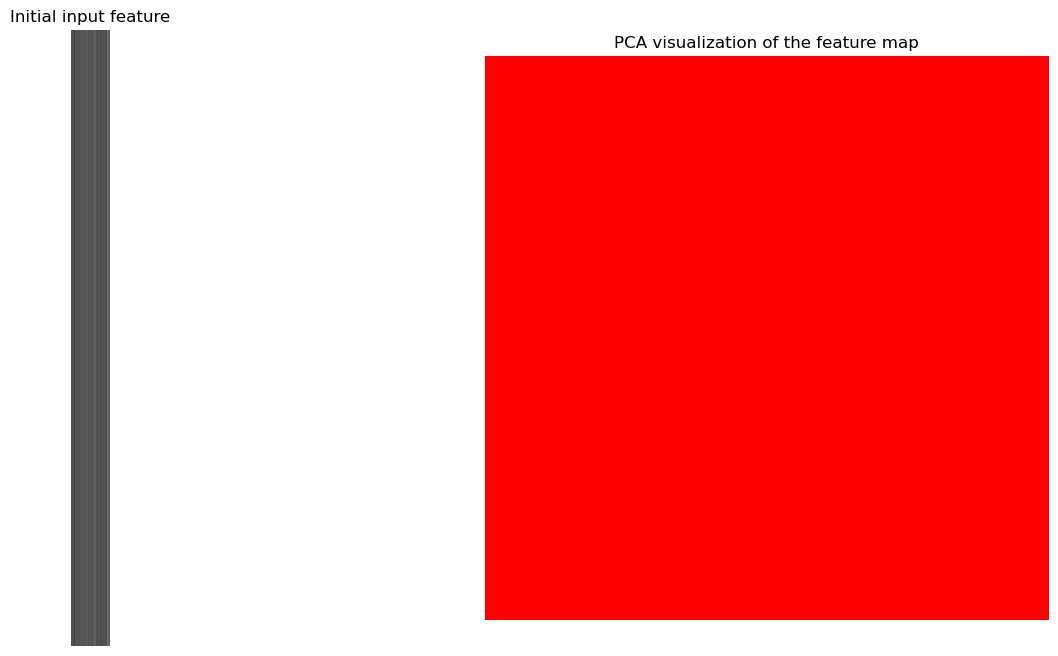

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Assuming 'out' is your encoder output with shape [1, 256, 64, 64]
# Extract the feature map and reshape it
out=np.load('/home/minkyukim/sam-tutorial/feature_output/brats_finetuned/layer_dense_embeddings_feature.npy')
# out=out.transpose(0, 3, 1, 2)
feature_map = out[0]  # Shape: [256, 64, 64]
feature_map_reshaped = feature_map.reshape(256, -1).T  # Shape: [4096, 256]
# Apply PCA
pca = PCA(n_components=3)
feature_map_pca = pca.fit_transform(feature_map_reshaped)
# Reshape back to image dimensions
feature_map_pca = feature_map_pca.reshape(64, 64, 3)
# Normalize to [0, 1] for visualization
feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())
# Plot the PCA visualization
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(feature_map_reshaped, cmap='gray')
plt.axis('off')
plt.title('Initial input feature')
plt.subplot(1, 2, 2)
plt.imshow(feature_map_pca_normalized, cmap='jet')
plt.axis('off')
plt.title('PCA visualization of the feature map')
plt.savefig('input_image.png', bbox_inches='tight', pad_inches=0)

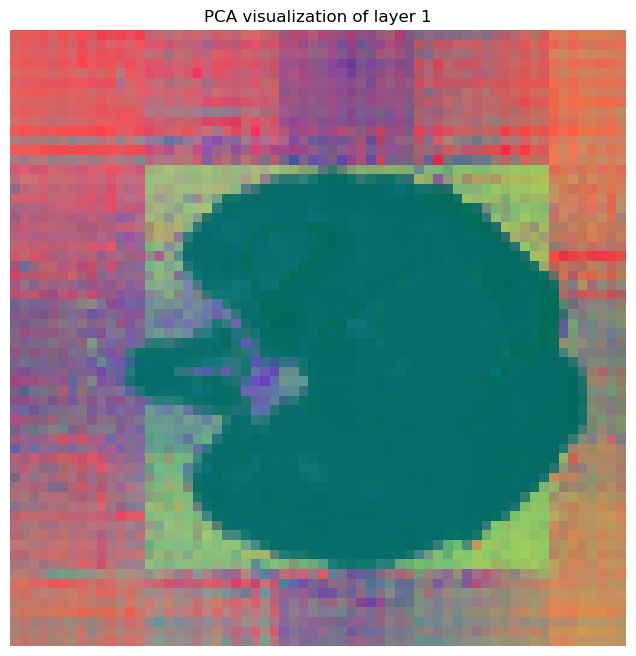

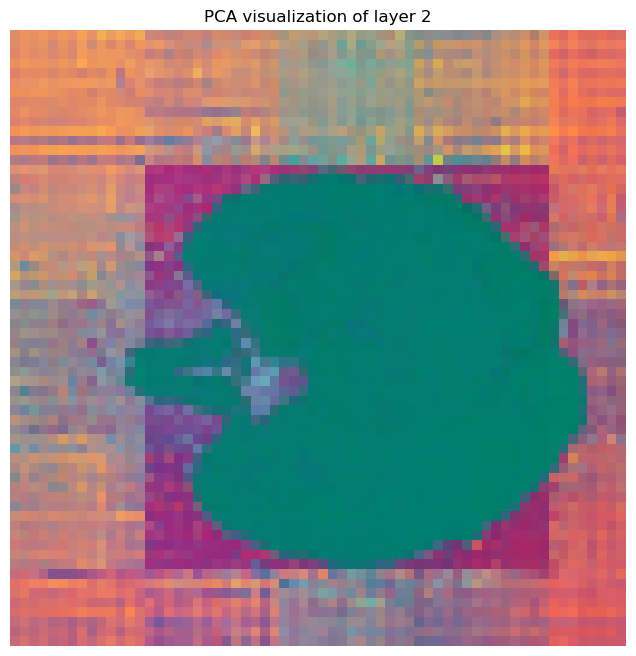

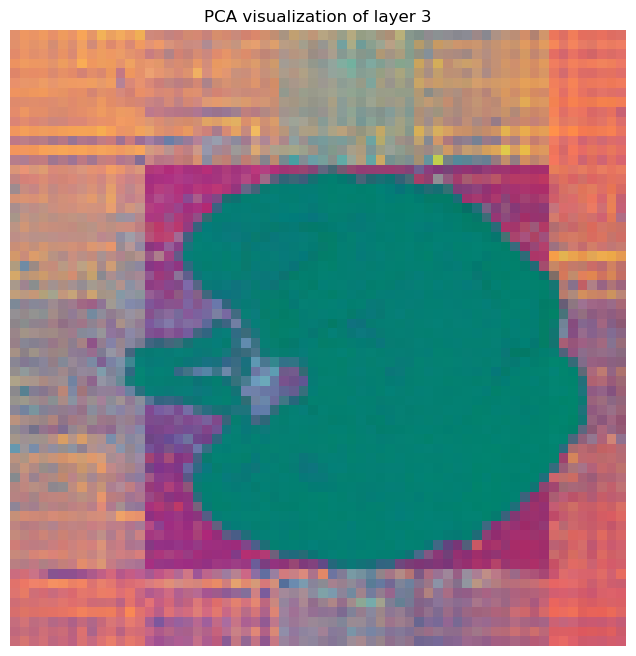

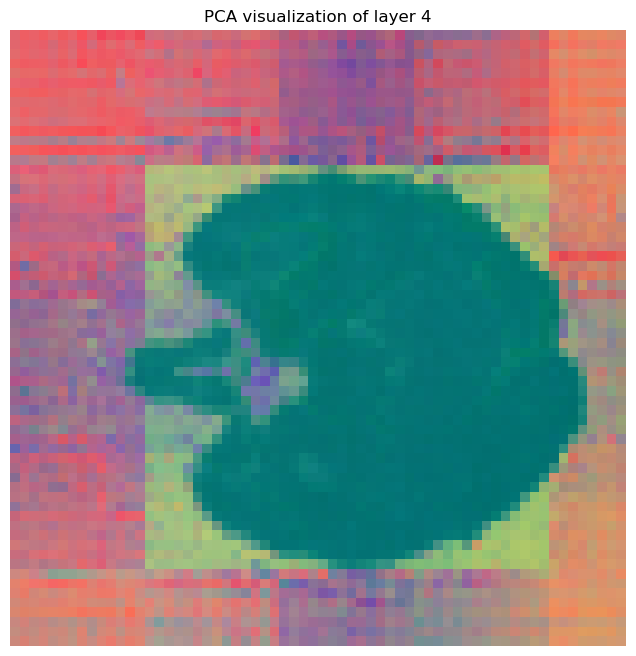

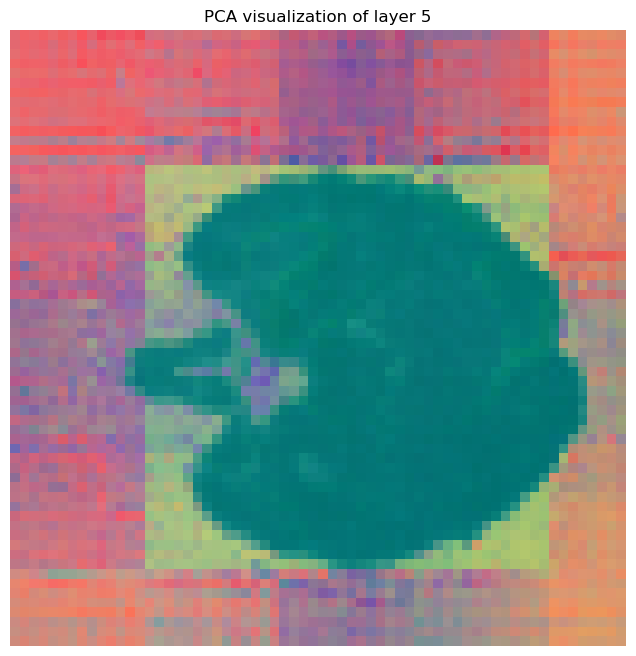

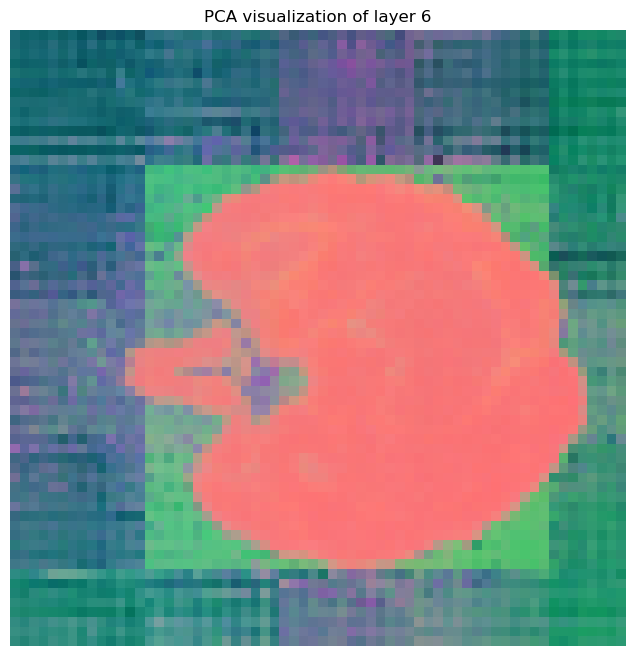

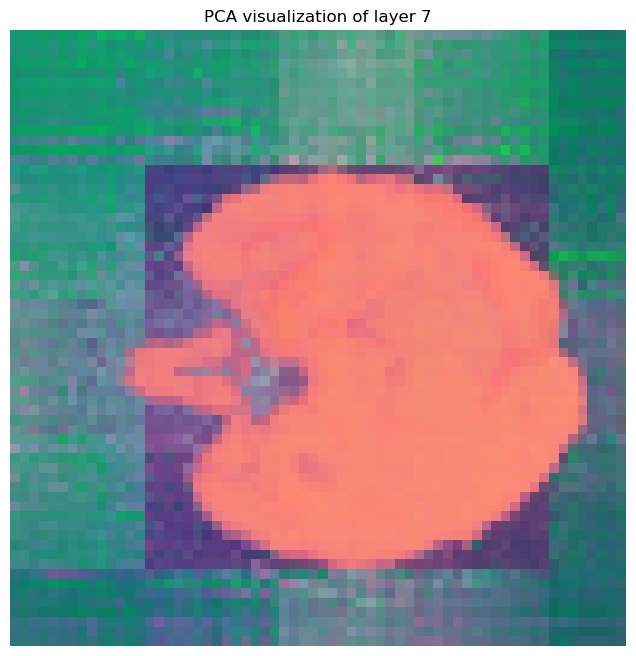

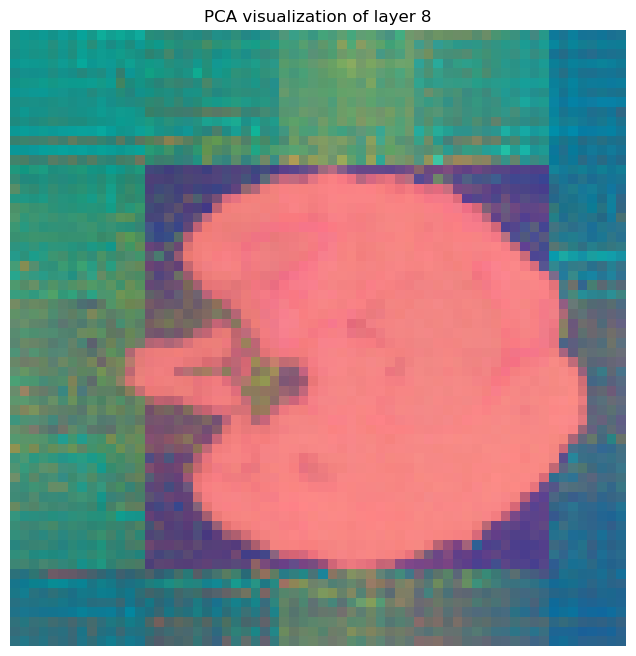

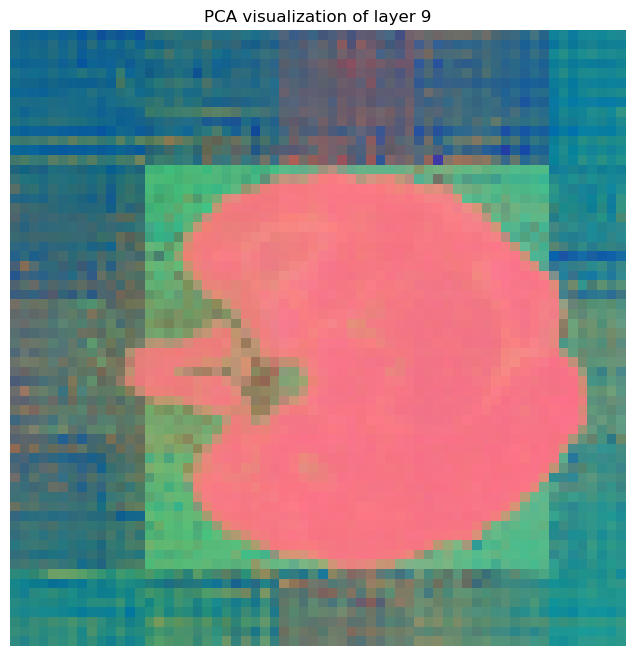

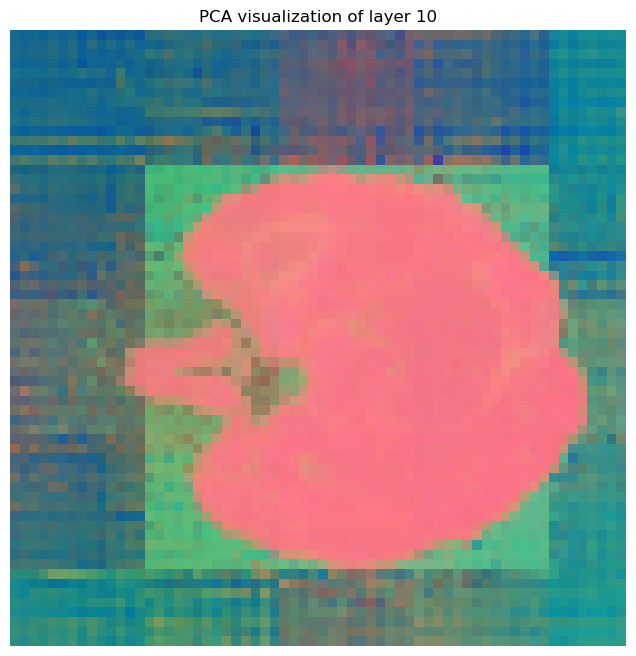

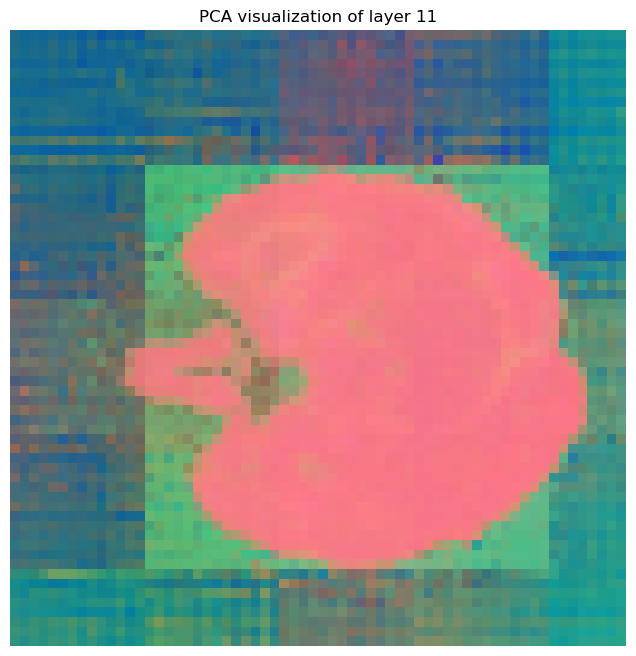

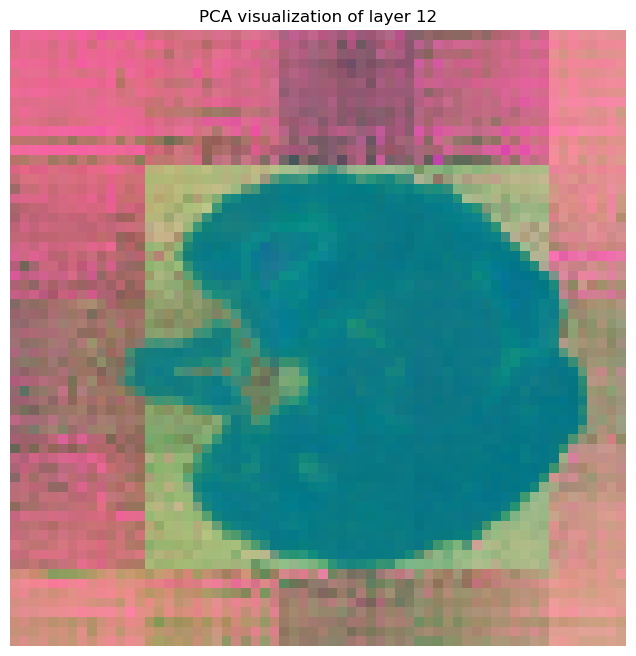

PCA 시각화가 모두 완료되었습니다.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

output_dir = '/home/minkyukim/sam-tutorial/brats_feature/'

for number in range(1, 13):

    file_path = os.path.join(output_dir, f'layer_{number}_output.npy')

    out = np.load(file_path)

    out = out.transpose(0, 3, 1, 2)

    feature_map = out[0]

    feature_map_reshaped = feature_map.reshape(768, -1).T

    pca = PCA(n_components=3)
    feature_map_pca = pca.fit_transform(feature_map_reshaped)

    feature_map_pca = feature_map_pca.reshape(64, 64, 3)

    feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())


    plt.figure(figsize=(8, 8))
    plt.imshow(feature_map_pca_normalized, cmap='jet')
    plt.axis('off')
    plt.title(f'PCA visualization of layer {number}')
    
  
    plt.show()
    plt.close()

print("PCA 시각화가 모두 완료되었습니다.")


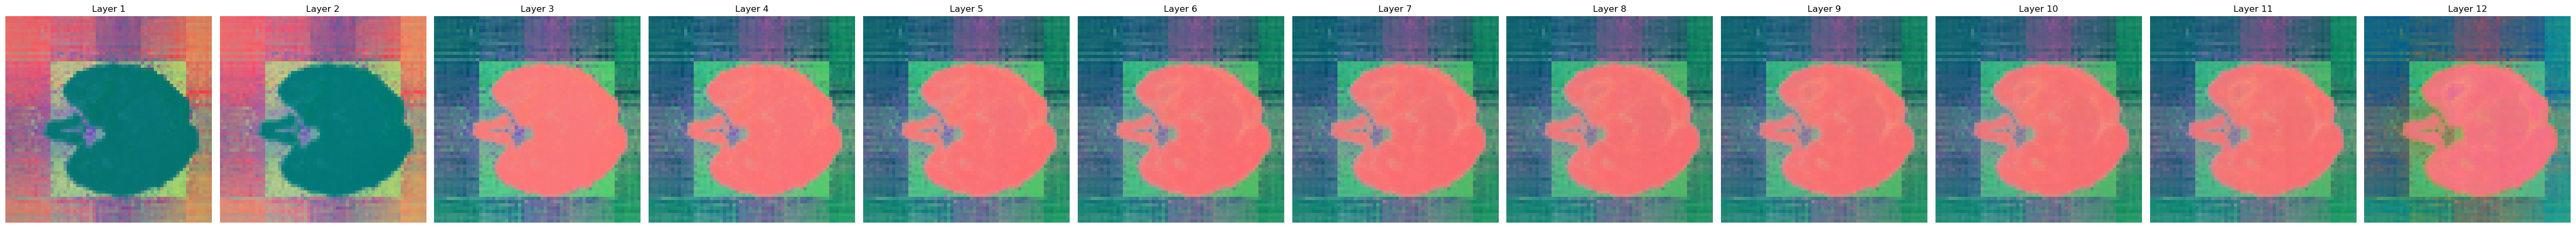

PCA 시각화가 모두 완료되었습니다.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

output_dir = '/home/minkyukim/sam-tutorial/feature_output/brats_finetuned/'

fig, axes = plt.subplots(1, 12, figsize=(48, 8))

for number in range(1, 13):

    file_path = os.path.join(output_dir, f'layer_{number}_output.npy')

    out = np.load(file_path)

    out = out.transpose(0, 3, 1, 2)

    feature_map = out[0]

    feature_map_reshaped = feature_map.reshape(768, -1).T

    pca = PCA(n_components=3)
    feature_map_pca = pca.fit_transform(feature_map_reshaped)

    feature_map_pca = feature_map_pca.reshape(64, 64, 3)

    feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())

    axes[number-1].imshow(feature_map_pca_normalized, cmap='jet')
    axes[number-1].axis('off')
    axes[number-1].set_title(f'Layer {number}')


plt.tight_layout()
plt.show()

print("PCA 시각화가 모두 완료되었습니다.")


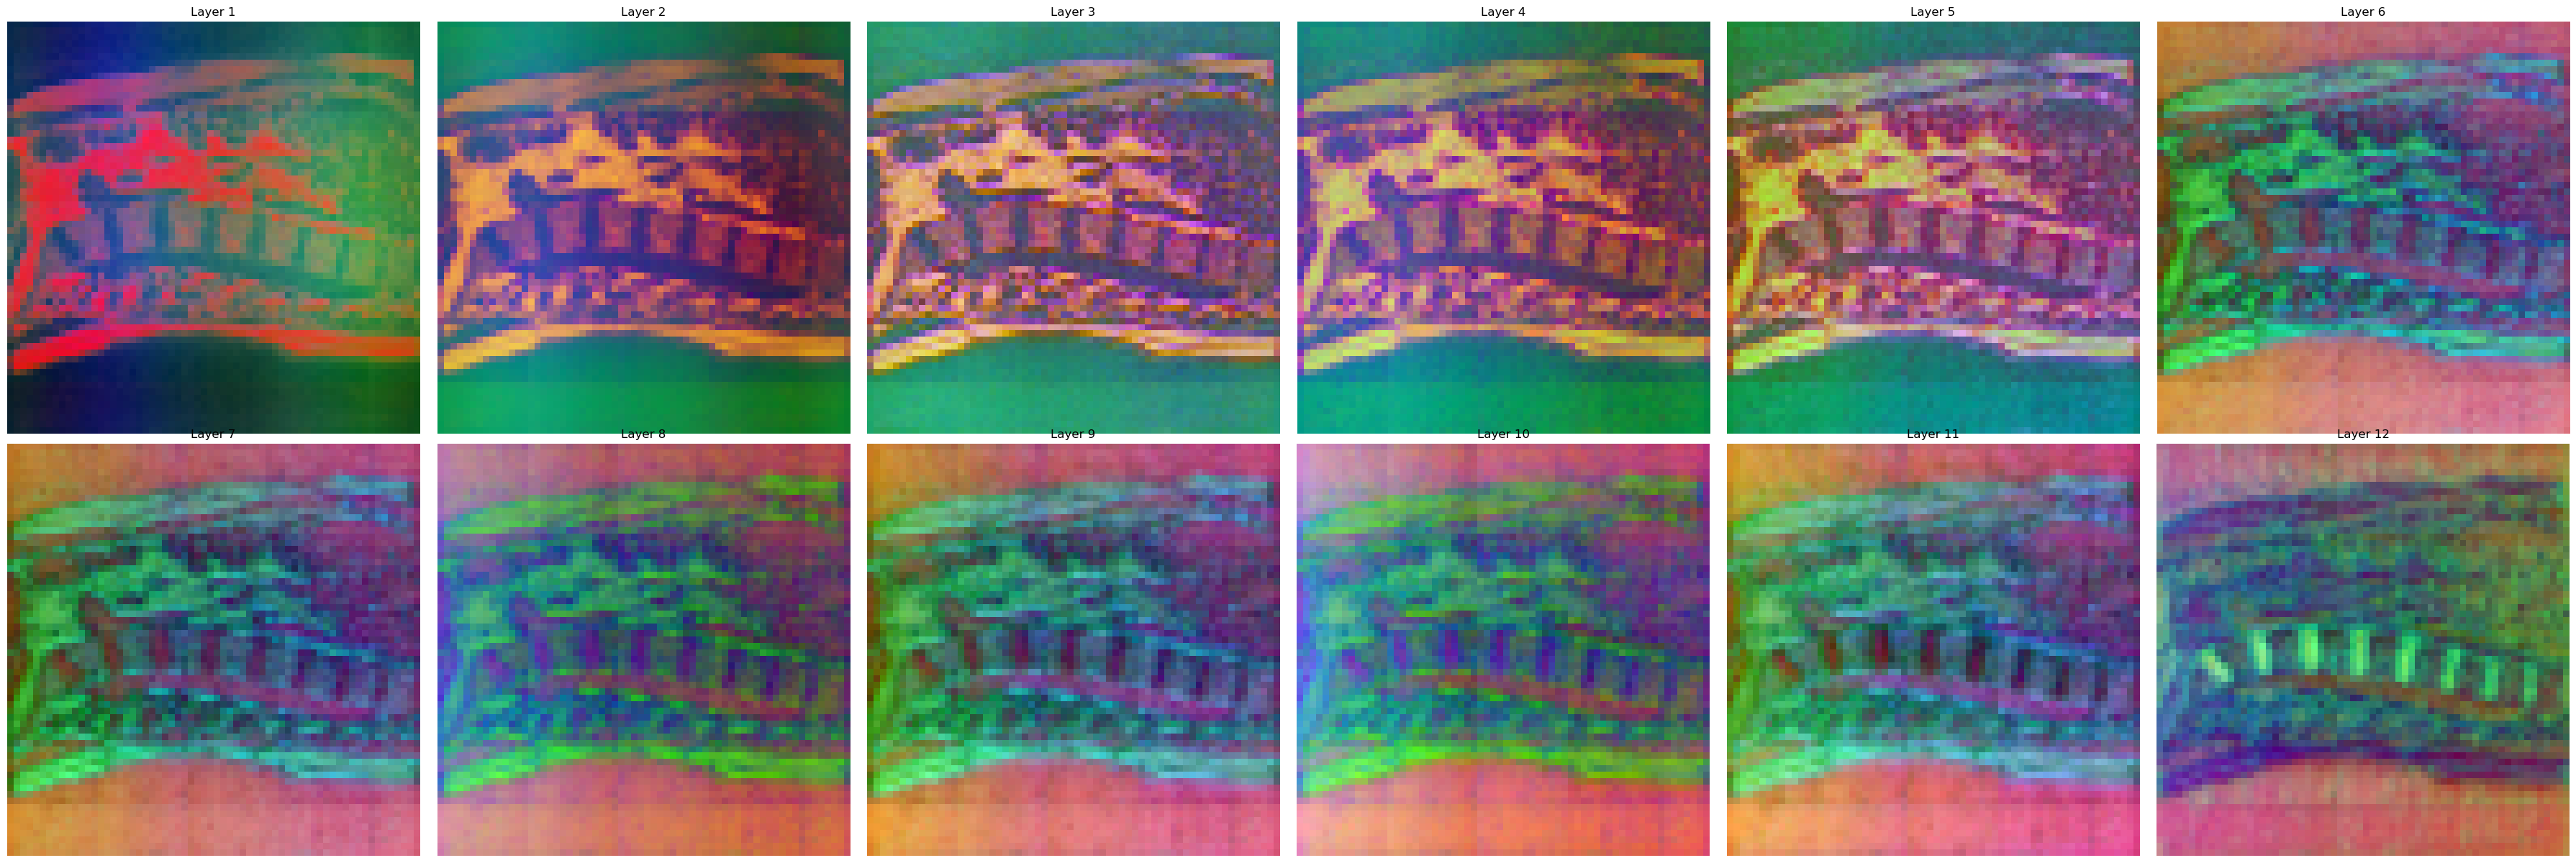

PCA 시각화가 모두 완료되었습니다.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

output_dir = '/home/minkyukim/sam-tutorial/feature_output/ivdm_finetuned/'

fig, axes = plt.subplots(2, 6, figsize=(36, 12))

for number in range(1, 13):

    file_path = os.path.join(output_dir, f'layer_{number}_output.npy')

    out = np.load(file_path)

    out = out.transpose(0, 3, 1, 2)

    feature_map = out[0]

    feature_map_reshaped = feature_map.reshape(768, -1).T

    pca = PCA(n_components=3)
    feature_map_pca = pca.fit_transform(feature_map_reshaped)

    feature_map_pca = feature_map_pca.reshape(64, 64, 3)

    feature_map_pca_normalized = (feature_map_pca - feature_map_pca.min()) / (feature_map_pca.max() - feature_map_pca.min())

    row = (number - 1) // 6
    col = (number - 1) % 6
    axes[row, col].imshow(feature_map_pca_normalized, cmap='jet')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Layer {number}')

plt.tight_layout()
plt.show()

print("PCA 시각화가 모두 완료되었습니다.")
